In [ ]:
# Aykırı Gözlem : Veride genel eğilimin dışına çıkan gözlemlere denir.Aykırı değeri barındıran gözlemdir.
# Aykırı Değer : Aykırılığı ifade eden nümreik değere denir.
# Aykırı değer genellenebilirlik kaygısı ile oluşturulan kural setlerini ya da fonksiyonları yanıltır.Yanlılığa sebeb olur.
# Aykırı değer olarak ortalamaya standart sapmanın 1,2 ya da 3 katı eklenilerek üstündeki değerlerin ayrık değer olduğu tespit edilebilir


In [1]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64", "int64"])
df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [2]:
df_table = df["table"]
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

<AxesSubplot:xlabel='table'>

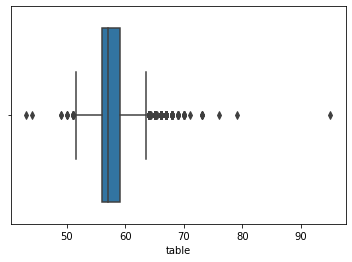

In [3]:
sns.boxplot(x= df_table)

In [4]:
Q1 = df_table.quantile(0.25)
Q3= df_table.quantile(0.75)
IQR = Q3 - Q1
Q1

56.0

In [5]:
Q3

59.0

In [6]:
IQR

3.0

In [14]:
alt_sinir = Q1 - 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [15]:
alt_sinir

51.5

In [16]:
ust_sinir

63.5

In [19]:
aykiri_tf = ((df_table < alt_sinir) | (df_table > ust_sinir))

In [20]:
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [21]:
df_table[aykiri_tf].index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

In [ ]:
# Silme


In [22]:
import pandas as pd
type(df_table)

pandas.core.series.Series

In [23]:
df_table = pd.DataFrame(df_table)

In [24]:
df_table.shape

(53940, 1)

In [26]:
t_df = df_table[~((df_table < alt_sinir) | (df_table > ust_sinir)).any(axis=1)] #alt sınırdan aşağıda ya da üst sınırdan yukarıda olanların dışındakileri t_df e at sütun bazında işlem yapmak için axis =1 dedik 

In [27]:
t_df.shape

(53335, 1)

In [ ]:
# Ortalama İle Doldurma

In [28]:
aykiri_tf.head()

0    False
1    False
2     True
3    False
4    False
Name: table, dtype: bool

In [29]:
df_table[aykiri_tf]

,table
2,65.0
91,69.0
145,64.0
219,64.0
227,67.0
...,...
53695,65.0
53697,65.0
53756,64.0
53757,64.0


In [30]:
df_table.mean()

table    57.457184
dtype: float64

In [31]:
df_table[aykiri_tf] = df_table.mean()

In [32]:
df_table[aykiri_tf]

,table
2,57.457184
91,57.457184
145,57.457184
219,57.457184
227,57.457184
...,...
53695,57.457184
53697,57.457184
53756,57.457184
53757,57.457184


In [ ]:
# Baskılama Yöntemi

In [33]:
import seaborn as sns
df = sns.load_dataset("diamonds")
df = df.select_dtypes(include = ["float64", "int64"])
df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [34]:
df_table = df["table"]

In [35]:
df_table[aykiri_tf]

2        65.0
91       69.0
145      64.0
219      64.0
227      67.0
         ... 
53695    65.0
53697    65.0
53756    64.0
53757    64.0
53785    65.0
Name: table, Length: 605, dtype: float64

In [36]:
df_table[aykiri_tf] = alt_sinir

In [37]:
df_table[aykiri_tf]

2        51.5
91       51.5
145      51.5
219      51.5
227      51.5
         ... 
53695    51.5
53697    51.5
53756    51.5
53757    51.5
53785    51.5
Name: table, Length: 605, dtype: float64

In [38]:
# Local Outlier Factor : Gözlemleri bulundukları konumda yoğunluk tabanlı skorlayarak buna göre aykırı değer olabilecek değerleri tanımlamamıza imkan sağlıyor.
import seaborn as sns
diamonds = sns.load_dataset("diamonds")
diamonds = diamonds.select_dtypes(["float64","int64"])
df = diamonds.copy()
df = df.dropna()
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [39]:
import numpy as np
from sklearn.neighbors import LocalOutlierFactor

In [40]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination = 0.1)


In [41]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [42]:
df_scores = clf.negative_outlier_factor_

In [43]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [48]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

In [53]:
esik_deger = np.sort(df_scores)[13]

In [54]:
aykiri_tf

0        False
1        False
2         True
3        False
4        False
         ...  
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [55]:
yeni_df = df[df_scores > esik_deger]

In [56]:
yeni_df

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [57]:
df[df_scores == esik_deger]

,carat,depth,table,price,x,y,z
31230,0.45,68.6,57.0,756,4.73,4.5,3.19


In [58]:
baski_degeri = df[df_scores == esik_deger]
aykirilar = df[~aykiri_tf]
res = aykirilar.to_records(index = False)

In [59]:
res[:] = baski_degeri.to_records(index = False)

In [60]:
res

rec.array([(0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19), ...,
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19),
           (0.45, 68.6, 57., 756, 4.73, 4.5, 3.19)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [61]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75
5,0.24,62.8,57.0,336,3.94,3.96,2.48
...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74


In [62]:
import pandas as pd
df[~aykiri_tf] = pd.DataFrame(res, index = df[~aykiri_tf].index)

In [63]:
df[~aykiri_tf]

,carat,depth,table,price,x,y,z
0,0.45,68.6,57.0,756,4.73,4.5,3.19
1,0.45,68.6,57.0,756,4.73,4.5,3.19
3,0.45,68.6,57.0,756,4.73,4.5,3.19
4,0.45,68.6,57.0,756,4.73,4.5,3.19
5,0.45,68.6,57.0,756,4.73,4.5,3.19
...,...,...,...,...,...,...,...
53935,0.45,68.6,57.0,756,4.73,4.5,3.19
53936,0.45,68.6,57.0,756,4.73,4.5,3.19
53937,0.45,68.6,57.0,756,4.73,4.5,3.19
53938,0.45,68.6,57.0,756,4.73,4.5,3.19


In [64]:
# Eksik Veri Nedir : İncelenen veri setindeki gözlemlerde eksiklik olması durumunu ifade etmektedir.
!pip install missingno


<AxesSubplot:>

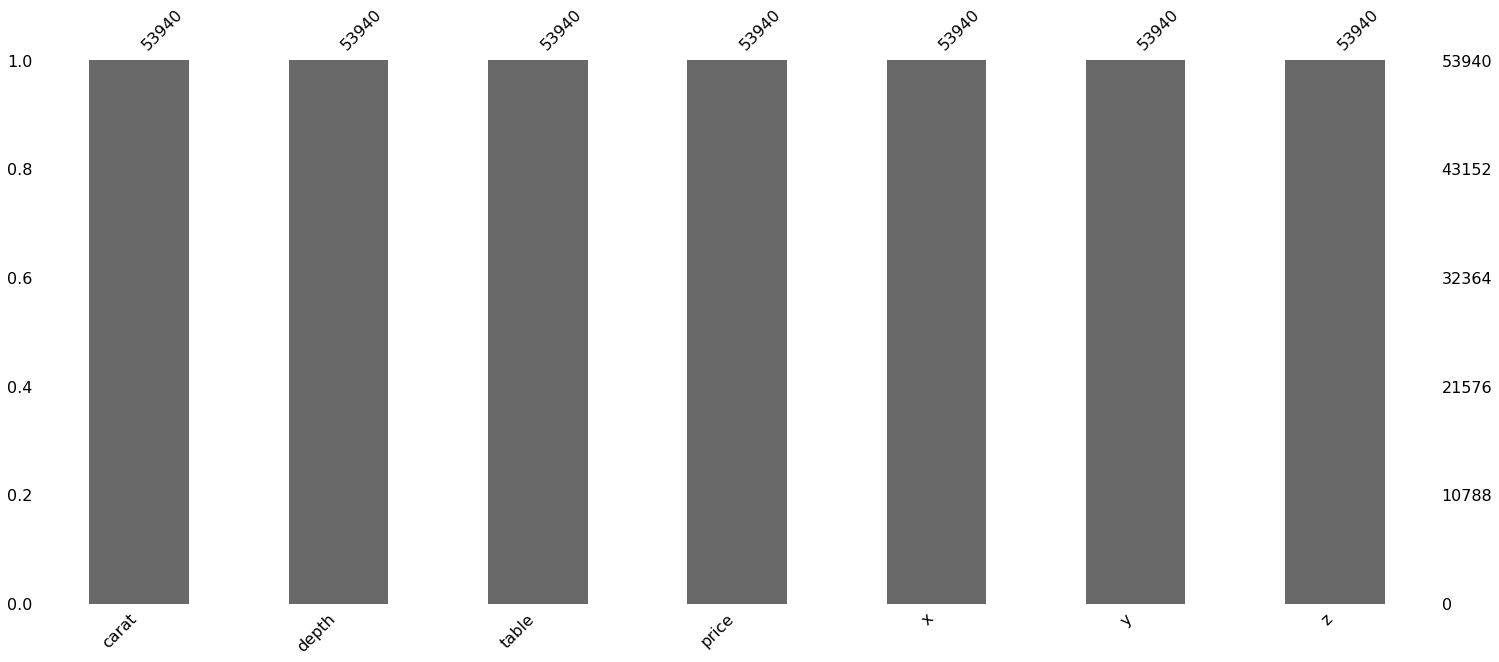

In [66]:
import missingno as msno
msno.bar(df)

<AxesSubplot:>

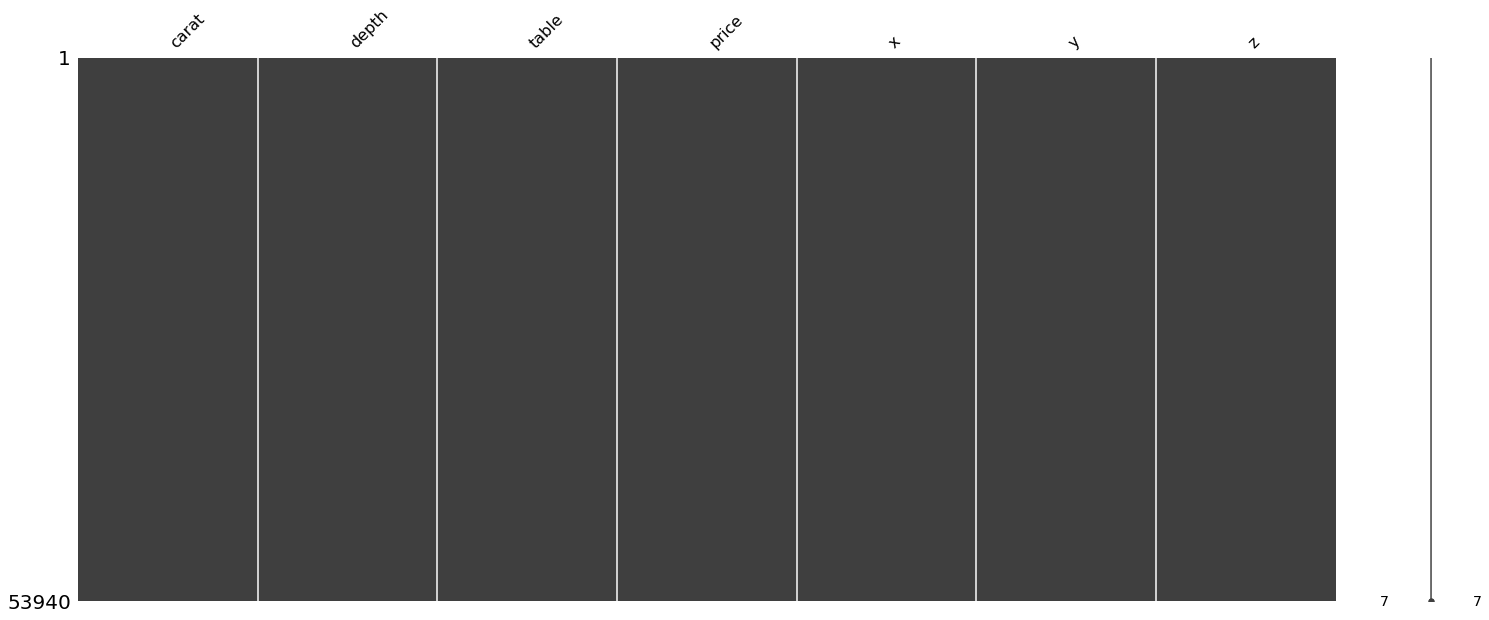

In [67]:
msno.matrix(df)

In [2]:
import seaborn as sns
df = sns.load_dataset("planets")
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [3]:
df.isnull().sum()


method              0
number              0
orbital_period     43
mass              522
distance          227
year                0
dtype: int64

<AxesSubplot:>

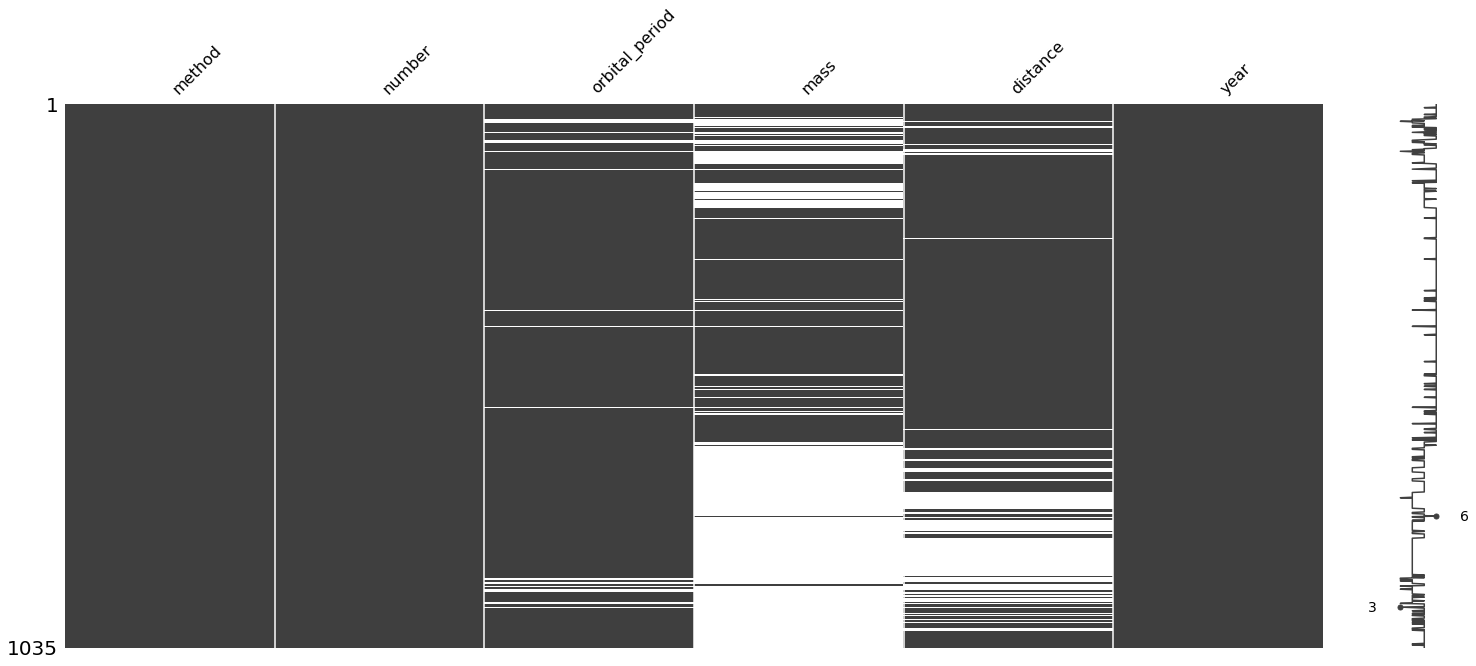

In [4]:
import missingno as msno
msno.matrix(df)

<AxesSubplot:>

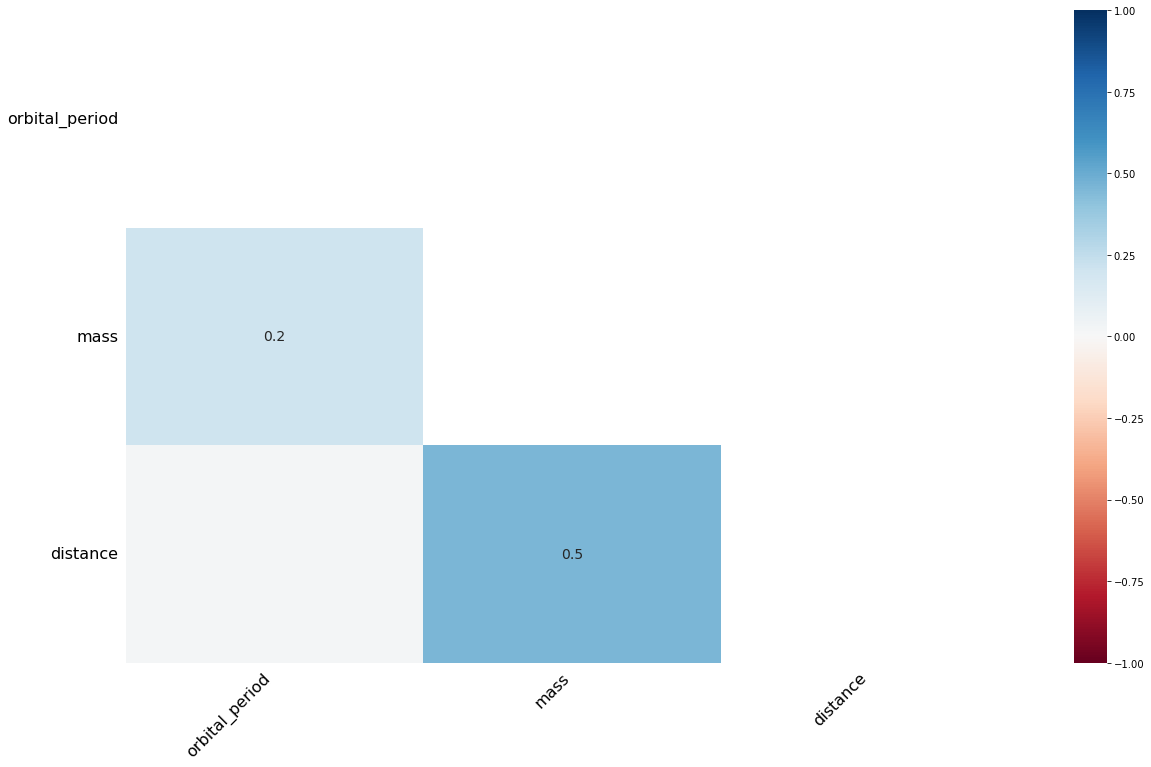

In [5]:
msno.heatmap(df)

In [6]:
df.dropna(how = "all") #satırdaki değerlerin hepsi null sa siler
df.dropna(axis = 0)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.30000,7.100,77.40,2006
1,Radial Velocity,1,874.77400,2.210,56.95,2008
2,Radial Velocity,1,763.00000,2.600,19.84,2011
3,Radial Velocity,1,326.03000,19.400,110.62,2007
4,Radial Velocity,1,516.22000,10.500,119.47,2009
...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009
641,Radial Velocity,1,5.05050,1.068,44.46,2013
642,Radial Velocity,1,311.28800,1.940,17.24,1999
649,Transit,1,2.70339,1.470,178.00,2013


In [11]:
import numpy as np
import pandas as pd
V1 =np.array([1,3,6,np.NaN,7,1,np.NaN,9,15]) 
V2 =np.array([7,np.NaN,5,8,12,np.NaN,np.NaN,2,3])
V3 =np.array([np.NaN,12,5,6,14,7,np.NaN,2,31])
V4 =np.array(["IT","IT","IK","IK","IK","IK","IK","IT","IT"])
df = pd.DataFrame(
    {"maas": V1,
     "V2" : V2,
     "V3" : V3,
     "departman" : V4}
)

df

,maas,V2,V3,departman
0,1.0,7.0,NaN,IT
1,3.0,NaN,12.0,IT
2,6.0,5.0,5.0,IK
3,NaN,8.0,6.0,IK
4,7.0,12.0,14.0,IK
5,1.0,NaN,7.0,IK
6,NaN,NaN,NaN,IK
7,9.0,2.0,2.0,IT
8,15.0,3.0,31.0,IT


In [12]:
df.groupby("departman")["maas"].mean()

departman
IK    4.666667
IT    7.000000
Name: maas, dtype: float64

In [21]:
df["maas"].fillna(df.groupby("departman")["maas"].transform("mean"))

0     1.000000
1     3.000000
2     6.000000
3     4.666667
4     7.000000
5     1.000000
6     4.666667
7     9.000000
8    15.000000
Name: maas, dtype: float64

In [22]:
import numpy as np
import pandas as pd
V1 =np.array([1,3,6,np.NaN,7,1,np.NaN,9,15]) 
V4 =np.array(["IT",np.nan,"IK","IK","IK","IK","IK","IT","IT"], dtype = object)
df = pd.DataFrame(
    {"maas": V1,
     "departman" : V4}
)

df

,maas,departman
0,1.0,IT
1,3.0,NaN
2,6.0,IK
3,NaN,IK
4,7.0,IK
5,1.0,IK
6,NaN,IK
7,9.0,IT
8,15.0,IT


In [27]:
df["departman"].fillna(df["departman"].mode()[0]) #mode[0] dememizin nedeni [0] dersek string olarak getirir demezsek sütunu gösterir

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [28]:
df["departman"].fillna(method="bfill") #boş değerleri kendisinden önceki değerle doldurur.

0    IT
1    IK
2    IK
3    IK
4    IK
5    IK
6    IK
7    IT
8    IT
Name: departman, dtype: object

In [32]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ["float64","int64"])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


177

In [37]:
!pip install ycimpute

In [55]:
from ycimpute.imputer import knnimput

In [56]:
var_names = list(df)

In [57]:
import numpy as np
n_df = np.array(df)

In [58]:
n_df[0:10]

array([[ 0.    ,  3.    , 22.    ,  1.    ,  0.    ,  7.25  ],
       [ 1.    ,  1.    , 38.    ,  1.    ,  0.    , 71.2833],
       [ 1.    ,  3.    , 26.    ,  0.    ,  0.    ,  7.925 ],
       [ 1.    ,  1.    , 35.    ,  1.    ,  0.    , 53.1   ],
       [ 0.    ,  3.    , 35.    ,  0.    ,  0.    ,  8.05  ],
       [ 0.    ,  3.    ,     nan,  0.    ,  0.    ,  8.4583],
       [ 0.    ,  1.    , 54.    ,  0.    ,  0.    , 51.8625],
       [ 0.    ,  3.    ,  2.    ,  3.    ,  1.    , 21.075 ],
       [ 1.    ,  3.    , 27.    ,  0.    ,  2.    , 11.1333],
       [ 1.    ,  2.    , 14.    ,  1.    ,  0.    , 30.0708]])

In [59]:
n_df.shape

(891, 6)

In [60]:
dff = knnimput.KNN(k = 4).complete(n_df)

Imputing row 1/891 with 0 missing, elapsed time: 0.072
Imputing row 101/891 with 0 missing, elapsed time: 0.073
Imputing row 201/891 with 0 missing, elapsed time: 0.073
Imputing row 301/891 with 1 missing, elapsed time: 0.074
Imputing row 401/891 with 0 missing, elapsed time: 0.075
Imputing row 501/891 with 0 missing, elapsed time: 0.075
Imputing row 601/891 with 0 missing, elapsed time: 0.076
Imputing row 701/891 with 0 missing, elapsed time: 0.076
Imputing row 801/891 with 0 missing, elapsed time: 0.077


In [61]:
type(dff)

numpy.ndarray

In [62]:
import pandas as pd
dff = pd.DataFrame(dff, columns = var_names)

In [63]:
type(dff)

pandas.core.frame.DataFrame

In [66]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [ ]:
#random forest

In [71]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ["float64","int64"])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [72]:
var_names = list(df)

In [174]:
import numpy as np
n_df = np.array(df)

In [175]:
from ycimpute.imputer import iterforest
dff = iterforest.IterImput().complete(n_df)

AttributeError: module 'ycimpute.imputer.iterforest' has no attribute 'IterImput'

In [75]:
dff = pd.DataFrame(dff, columns = var_names)

In [76]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [77]:
#EM

In [78]:
import seaborn as sns
import missingno as msno
df = sns.load_dataset("titanic")
df = df.select_dtypes(include = ["float64","int64"])
print(df.head())
df.isnull().sum()

   survived  pclass   age  sibsp  parch     fare
0         0       3  22.0      1      0   7.2500
1         1       1  38.0      1      0  71.2833
2         1       3  26.0      0      0   7.9250
3         1       1  35.0      1      0  53.1000
4         0       3  35.0      0      0   8.0500


survived      0
pclass        0
age         177
sibsp         0
parch         0
fare          0
dtype: int64

In [79]:
from ycimpute.imputer import EM

In [80]:
var_names = list(df)

In [81]:
import numpy as np
n_df = np.array(df)

In [83]:
dff = EM().complete(n_df)

In [84]:
dff = pd.DataFrame(dff, columns=var_names)

In [85]:
dff.isnull().sum()

survived    0
pclass      0
age         0
sibsp       0
parch       0
fare        0
dtype: int64

In [86]:
dff

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.0,1.0,0.0,7.2500
1,1.0,1.0,38.0,1.0,0.0,71.2833
2,1.0,3.0,26.0,0.0,0.0,7.9250
3,1.0,1.0,35.0,1.0,0.0,53.1000
4,0.0,3.0,35.0,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.0,0.0,0.0,13.0000
887,1.0,1.0,19.0,0.0,0.0,30.0000
888,0.0,3.0,0.0,1.0,2.0,23.4500
889,1.0,1.0,26.0,0.0,0.0,30.0000


In [105]:
#Değişken Standartizasyonu : Değişkenin kendi içindeki bilgi yapısı bozulmaz ama belli bir standarta oturur.Değişkenin ortalama standart sapma varyansı değişecektir ama değişkenin taşıdığı bilginin özütü değişmeyecektir. 
#Değişken Dönüşümü : Değişkenin yapısı değişecektir.
import numpy as np
import pandas as pd
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])
df = pd.DataFrame(
     {"V1" : V1,
      "V2" : V2,
      "V3" : V3})
df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [106]:
#Standartizasyon
from sklearn import preprocessing
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [107]:
#Normalizasyon

In [110]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

In [ ]:
#Min-Max Dönüşümü

In [113]:
scaler = preprocessing.MinMaxScaler(feature_range = (10,20))

In [114]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

In [115]:
import seaborn as sns
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [116]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
lbe.fit_transform(df["sex"])

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0])

In [117]:
df["new_sex"] = lbe.fit_transform(df["sex"])

In [118]:
df

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1
242,17.82,1.75,Male,No,Sat,Dinner,2,1


In [119]:
# 1 ve Diğerleri Dönüşümü

In [121]:
import numpy as np
df["new_day"] = np.where(df["day"].str.contains("Sun"), 1, 0)

In [122]:
df

,total_bill,tip,sex,smoker,day,time,size,new_sex,new_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,1,0
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,1,0
242,17.82,1.75,Male,No,Sat,Dinner,2,1,0


In [123]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
lbe.fit_transform(df["day"])

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3])

In [124]:
#Çok Dikkat : Kategorik değişkeni nümerik yaptıysak kategorik değişkenin bağımlı değişkene yaptığı etkiyi makine anlamayacaktır.Bu da yanlı olup makineyi çıkmaza sokacaktır.Bu gibidurumlar için One Hot Encoding yapmak en doğrusudur.


In [125]:
#One-Hot Dönüşümü ve Dummy Değişken Tuzağı

In [126]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex,new_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0,1


In [128]:
df_one_hot = pd.get_dummies(df, columns= ["sex"], prefix = ["sex"])

In [129]:
df_one_hot.head()

,total_bill,tip,smoker,day,time,size,new_sex,new_day,sex_Male,sex_Female
0,16.99,1.01,No,Sun,Dinner,2,0,1,0,1
1,10.34,1.66,No,Sun,Dinner,3,1,1,1,0
2,21.01,3.50,No,Sun,Dinner,3,1,1,1,0
3,23.68,3.31,No,Sun,Dinner,2,1,1,1,0
4,24.59,3.61,No,Sun,Dinner,4,0,1,0,1


In [130]:
#Bir değişkeni ifade eden başka bir değişken varsa dummy değişken tuzağıdır.

In [133]:
pd.get_dummies(df, columns= ["day"]).head()

,total_bill,tip,sex,smoker,time,size,new_sex,new_day,day_Thur,day_Fri,day_Sat,day_Sun
0,16.99,1.01,Female,No,Dinner,2,0,1,0,0,0,1
1,10.34,1.66,Male,No,Dinner,3,1,1,0,0,0,1
2,21.01,3.50,Male,No,Dinner,3,1,1,0,0,0,1
3,23.68,3.31,Male,No,Dinner,2,1,1,0,0,0,1
4,24.59,3.61,Female,No,Dinner,4,0,1,0,0,0,1


In [134]:
import numpy as np
import pandas as pd


In [135]:
V1 = np.array([1,3,6,5,7])
V2 = np.array([7,7,5,8,12])
V3 = np.array([6,12,5,6,14])

df = pd.DataFrame(
     {"V1" : V1,
      "V2" : V2,
      "V3" : V3}
)

df = df.astype(float)
df

,V1,V2,V3
0,1.0,7.0,6.0
1,3.0,7.0,12.0
2,6.0,5.0,5.0
3,5.0,8.0,6.0
4,7.0,12.0,14.0


In [136]:
from sklearn import preprocessing
preprocessing.scale(df)

array([[-1.57841037, -0.34554737, -0.70920814],
       [-0.64993368, -0.34554737,  0.92742603],
       [ 0.74278135, -1.2094158 , -0.98198051],
       [ 0.27854301,  0.08638684, -0.70920814],
       [ 1.2070197 ,  1.81412369,  1.47297076]])

In [ ]:
#Normalizasyon

In [137]:
preprocessing.normalize(df)

array([[0.10783277, 0.75482941, 0.64699664],
       [0.21107926, 0.49251828, 0.84431705],
       [0.64699664, 0.53916387, 0.53916387],
       [0.4472136 , 0.71554175, 0.53665631],
       [0.35491409, 0.60842415, 0.70982818]])

In [138]:
scaler = preprocessing.MinMaxScaler(feature_range = (10,20))

In [144]:
scaler.fit_transform(df)

array([[10.        , 12.85714286, 11.11111111],
       [13.33333333, 12.85714286, 17.77777778],
       [18.33333333, 10.        , 10.        ],
       [16.66666667, 14.28571429, 11.11111111],
       [20.        , 20.        , 20.        ]])

In [145]:
#Binarize Dönüşüm

In [146]:
binarizer = preprocessing.Binarizer(threshold = 5).fit(df)

In [147]:
binarizer.transform(df)

array([[0., 1., 1.],
       [0., 1., 1.],
       [1., 0., 0.],
       [0., 1., 1.],
       [1., 1., 1.]])

In [148]:
# 0-1 Dönüşümü

In [151]:
import seaborn as sns
tips = sns.load_dataset("tips")
df = tips.copy()
df_l = df.copy()

In [157]:
df_l["new_sex"] = df_l["sex"].cat.codes
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,1


In [160]:
lbe = preprocessing.LabelEncoder()
df_l["new1_sex"] = lbe.fit_transform(df_l["sex"])

In [161]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex,new1_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [ ]:
# 1 ve Diğerleri Dönüşümü

In [162]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [163]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex,new1_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0


In [164]:
df_l["new_day"] = np.where(df_l["day"].str.contains("Sun"),1 ,0)

In [165]:
df_l.head()

,total_bill,tip,sex,smoker,day,time,size,new_sex,new1_sex,new_day
0,16.99,1.01,Female,No,Sun,Dinner,2,1,0,1
1,10.34,1.66,Male,No,Sun,Dinner,3,0,1,1
2,21.01,3.50,Male,No,Sun,Dinner,3,0,1,1
3,23.68,3.31,Male,No,Sun,Dinner,2,0,1,1
4,24.59,3.61,Female,No,Sun,Dinner,4,1,0,1


In [ ]:
#Çok Sınıflı Dönüşüm

In [ ]:
lbe = preprocessing.LabelEncoder()

In [166]:
df_l["new_day1"] = lbe.fit_transform(df_l["day"])
#Dummy Değişken tuzağından kurtulmak için kategorik değişkenin sınıf sayısı -1 adet dummy sınıf oluşturulmalıdır.


In [ ]:
#Sürekli Değişkeni Kategorik Değişkene Çevirme

In [167]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [171]:
dff = df.select_dtypes(include =["float64","int64"])

In [172]:
est = preprocessing.KBinsDiscretizer(n_bins =[3,2,2], encode="ordinal", strategy = "quantile" ).fit(dff)

In [173]:
est.transform(dff)[0:10]

array([[1., 0., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [2., 1., 1.],
       [0., 0., 1.],
       [2., 1., 1.],
       [1., 0., 1.],
       [0., 1., 1.]])